In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import numpy as np
%matplotlib inline

In [11]:
대주주외국인지분변화 = pd.read_csv('./datasets/대주주외국인지분변화.csv',encoding='utf-8-sig',index_col=0)
산업분류_G임금 = pd.read_csv('./datasets/산업분류_G임금.csv',encoding='utf-8-sig',index_col=0)
토빈Q = pd.read_csv('./datasets/토빈Q.csv',encoding='utf-8-sig',index_col=0)
현금흐름 = pd.read_csv('./datasets/현금흐름.csv',encoding='utf-8-sig',index_col=0)
RDS = pd.read_csv('./datasets/RDS.csv',encoding='utf-8-sig',index_col=0)
target = pd.read_csv('./datasets/target.csv',encoding='utf-8-sig',index_col=0)

In [13]:
 #회계년도컬럼, 년도만 뽑아서 int화
def change_year(x):
    return int(x[:4])
대주주외국인지분변화["회계년도"] = 대주주외국인지분변화["회계년도"].map(change_year) # 년도만 표시

In [14]:
df = pd.merge(대주주외국인지분변화,산업분류_G임금, on=['회사명','거래소코드','회계년도'],how='inner')
df = pd.merge(df,토빈Q, on=['회사명','거래소코드','회계년도'],how='inner')
df = pd.merge(df,현금흐름, on=['회사명','거래소코드','회계년도'],how='inner')
df = pd.merge(df,RDS, on=['회사명','거래소코드','회계년도'],how='inner')
df = pd.merge(df,target, on=['회사명','거래소코드','회계년도'],how='inner')

In [28]:
df.to_csv('임시완성.csv',encoding='utf-8-sig')

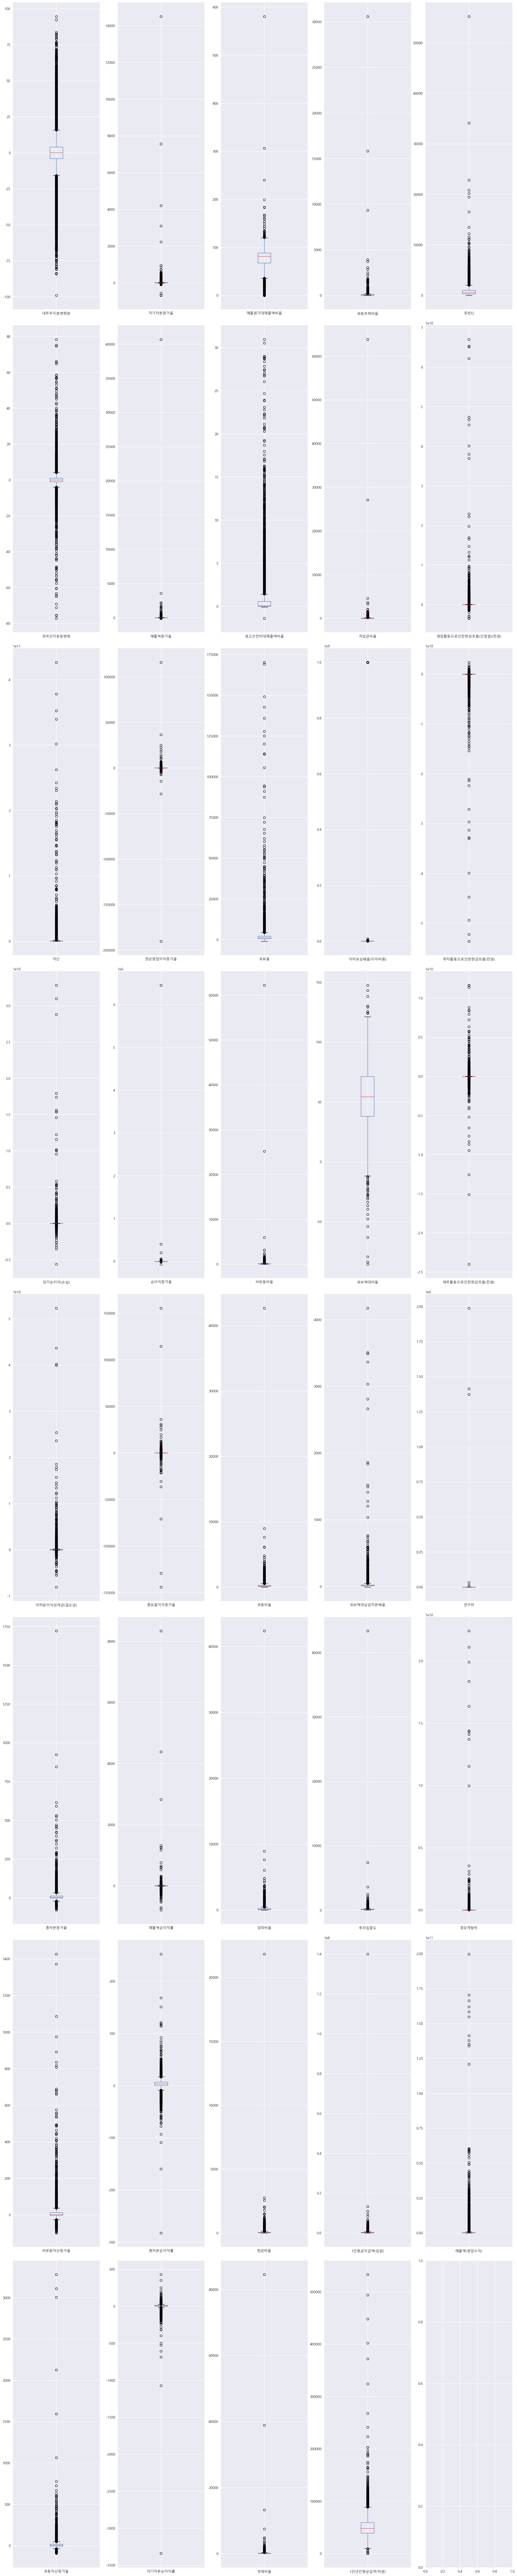

In [26]:
## 박스플랏
def boxplot(df,ncols,nrows): 
    plt.style.use('seaborn')
    warnings.simplefilter(action='ignore', category=FutureWarning)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = "Malgun Gothic"


    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

    fig.set_size_inches((20, 100))

    for col, ax in zip(df.columns, axs.T.ravel()):
        df[[col]].boxplot(ax=ax)
        
    plt.show()

수치형_df =df.select_dtypes('float')

boxplot(수치형_df,5,8)



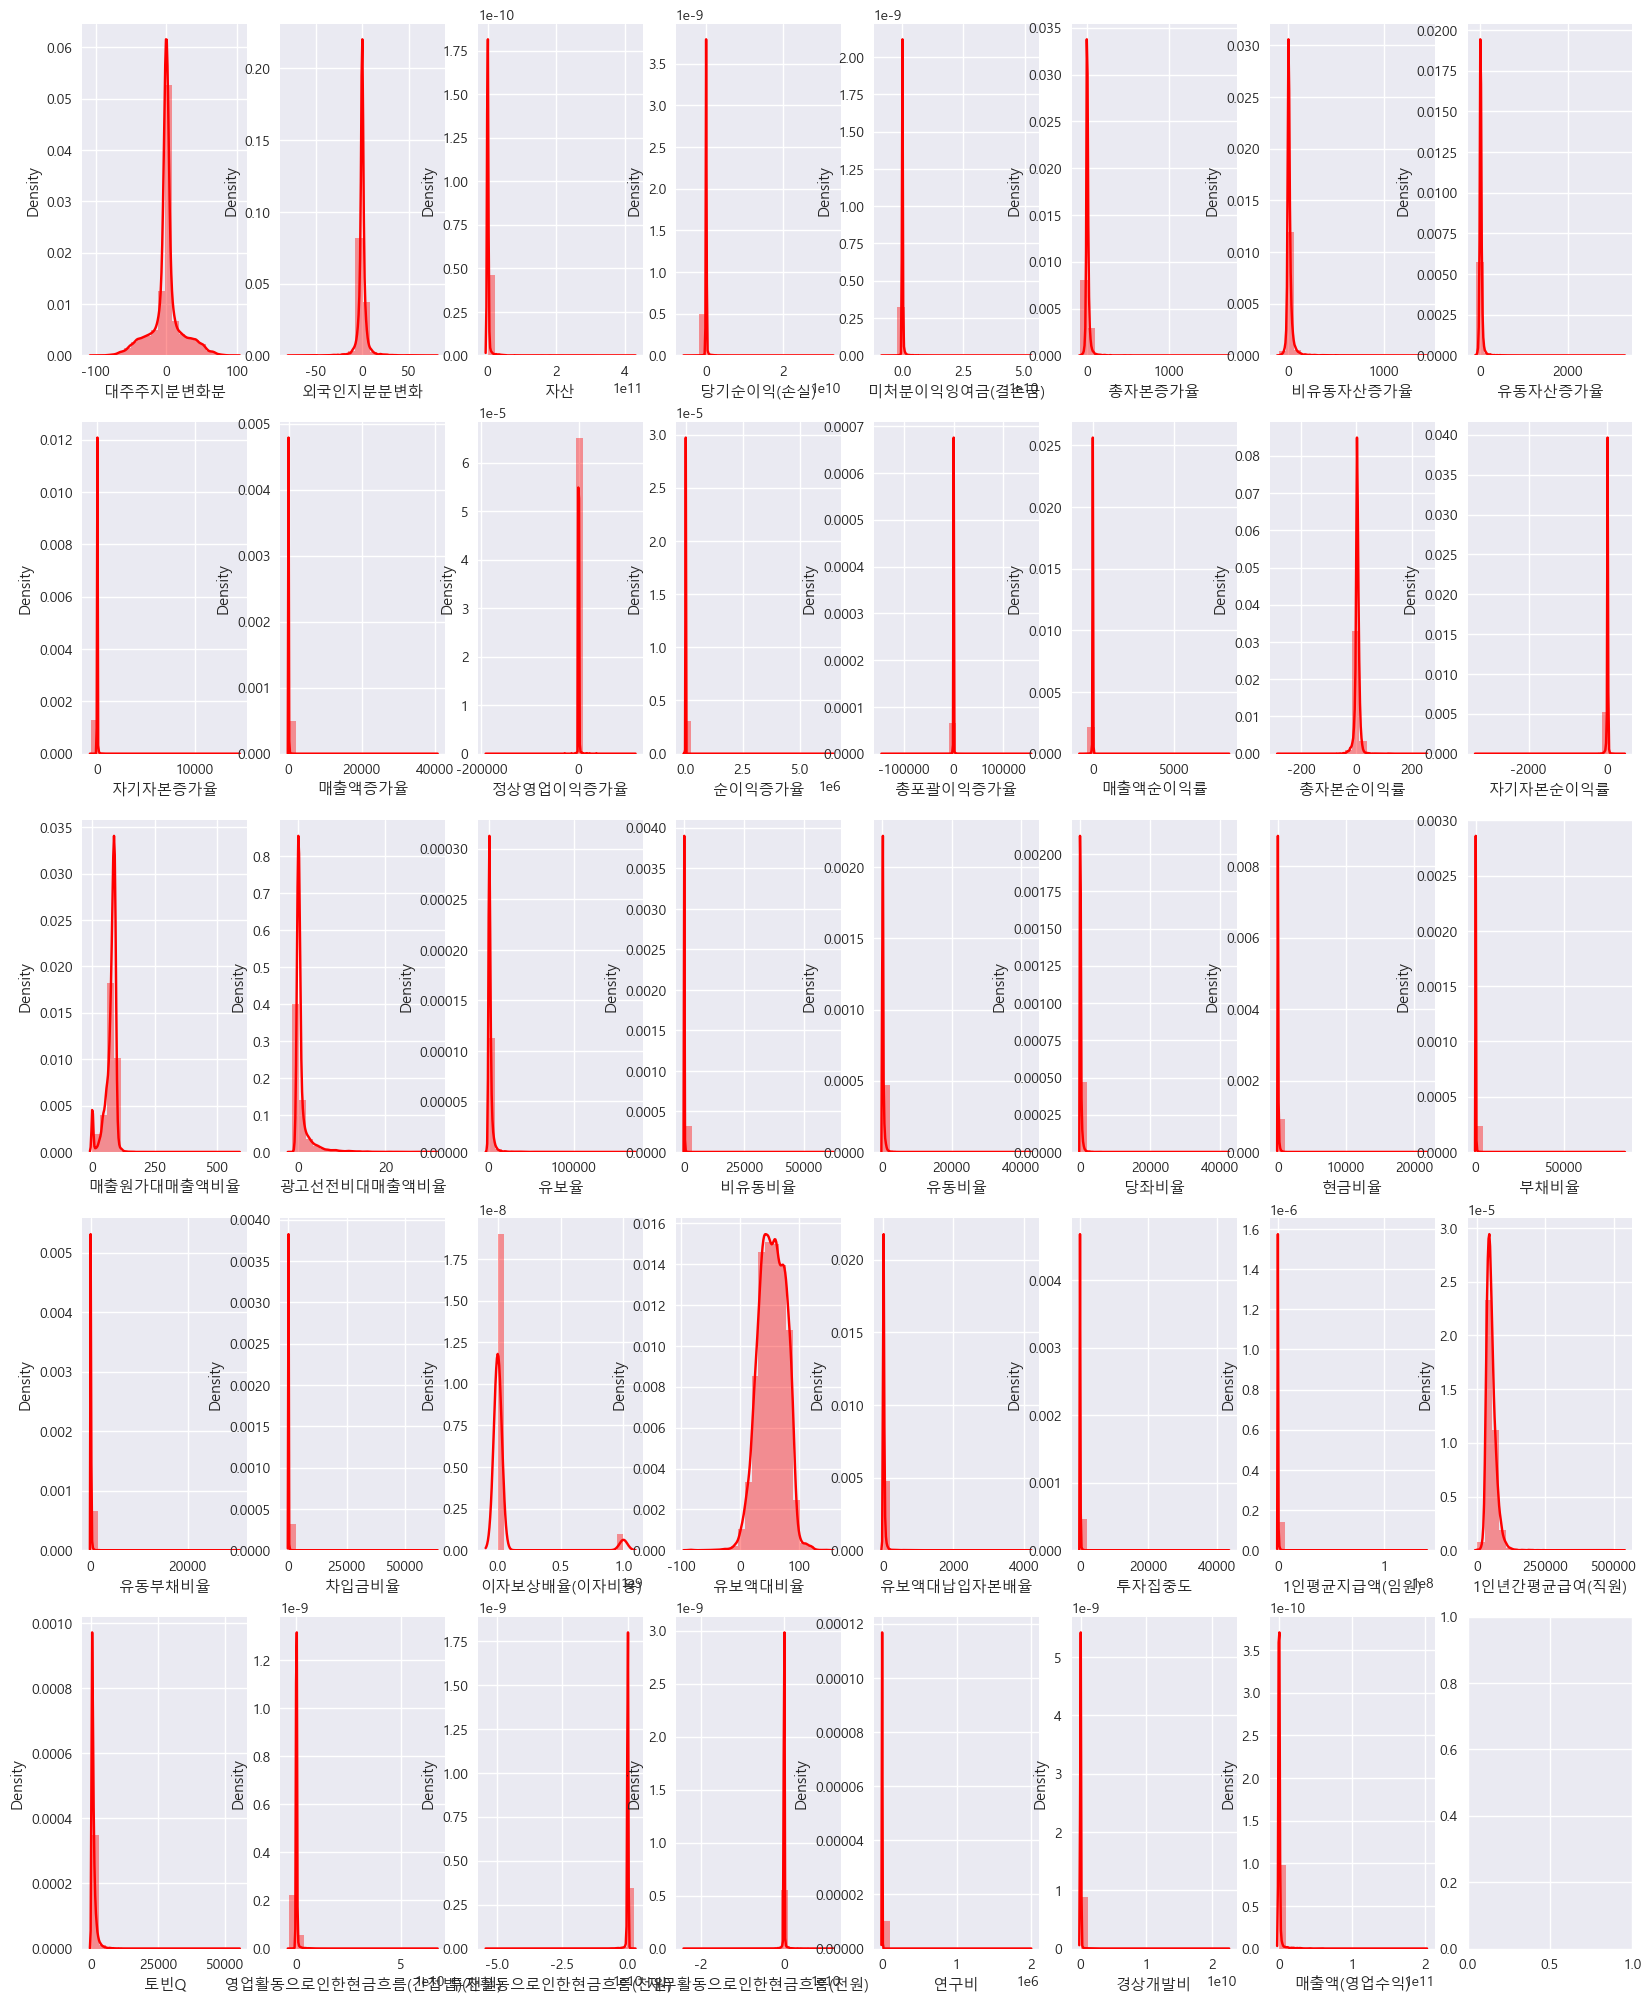

In [27]:
## distplot
def dist (df,col_n,row_n):
    
    plt.rcParams['font.family'] = "Malgun Gothic"
    plt.rcParams['axes.unicode_minus'] = False # 마이너스숫자 출력처리

    fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

    for i, col in enumerate(df.columns[:]):
        sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

dist(수치형_df,8,5)

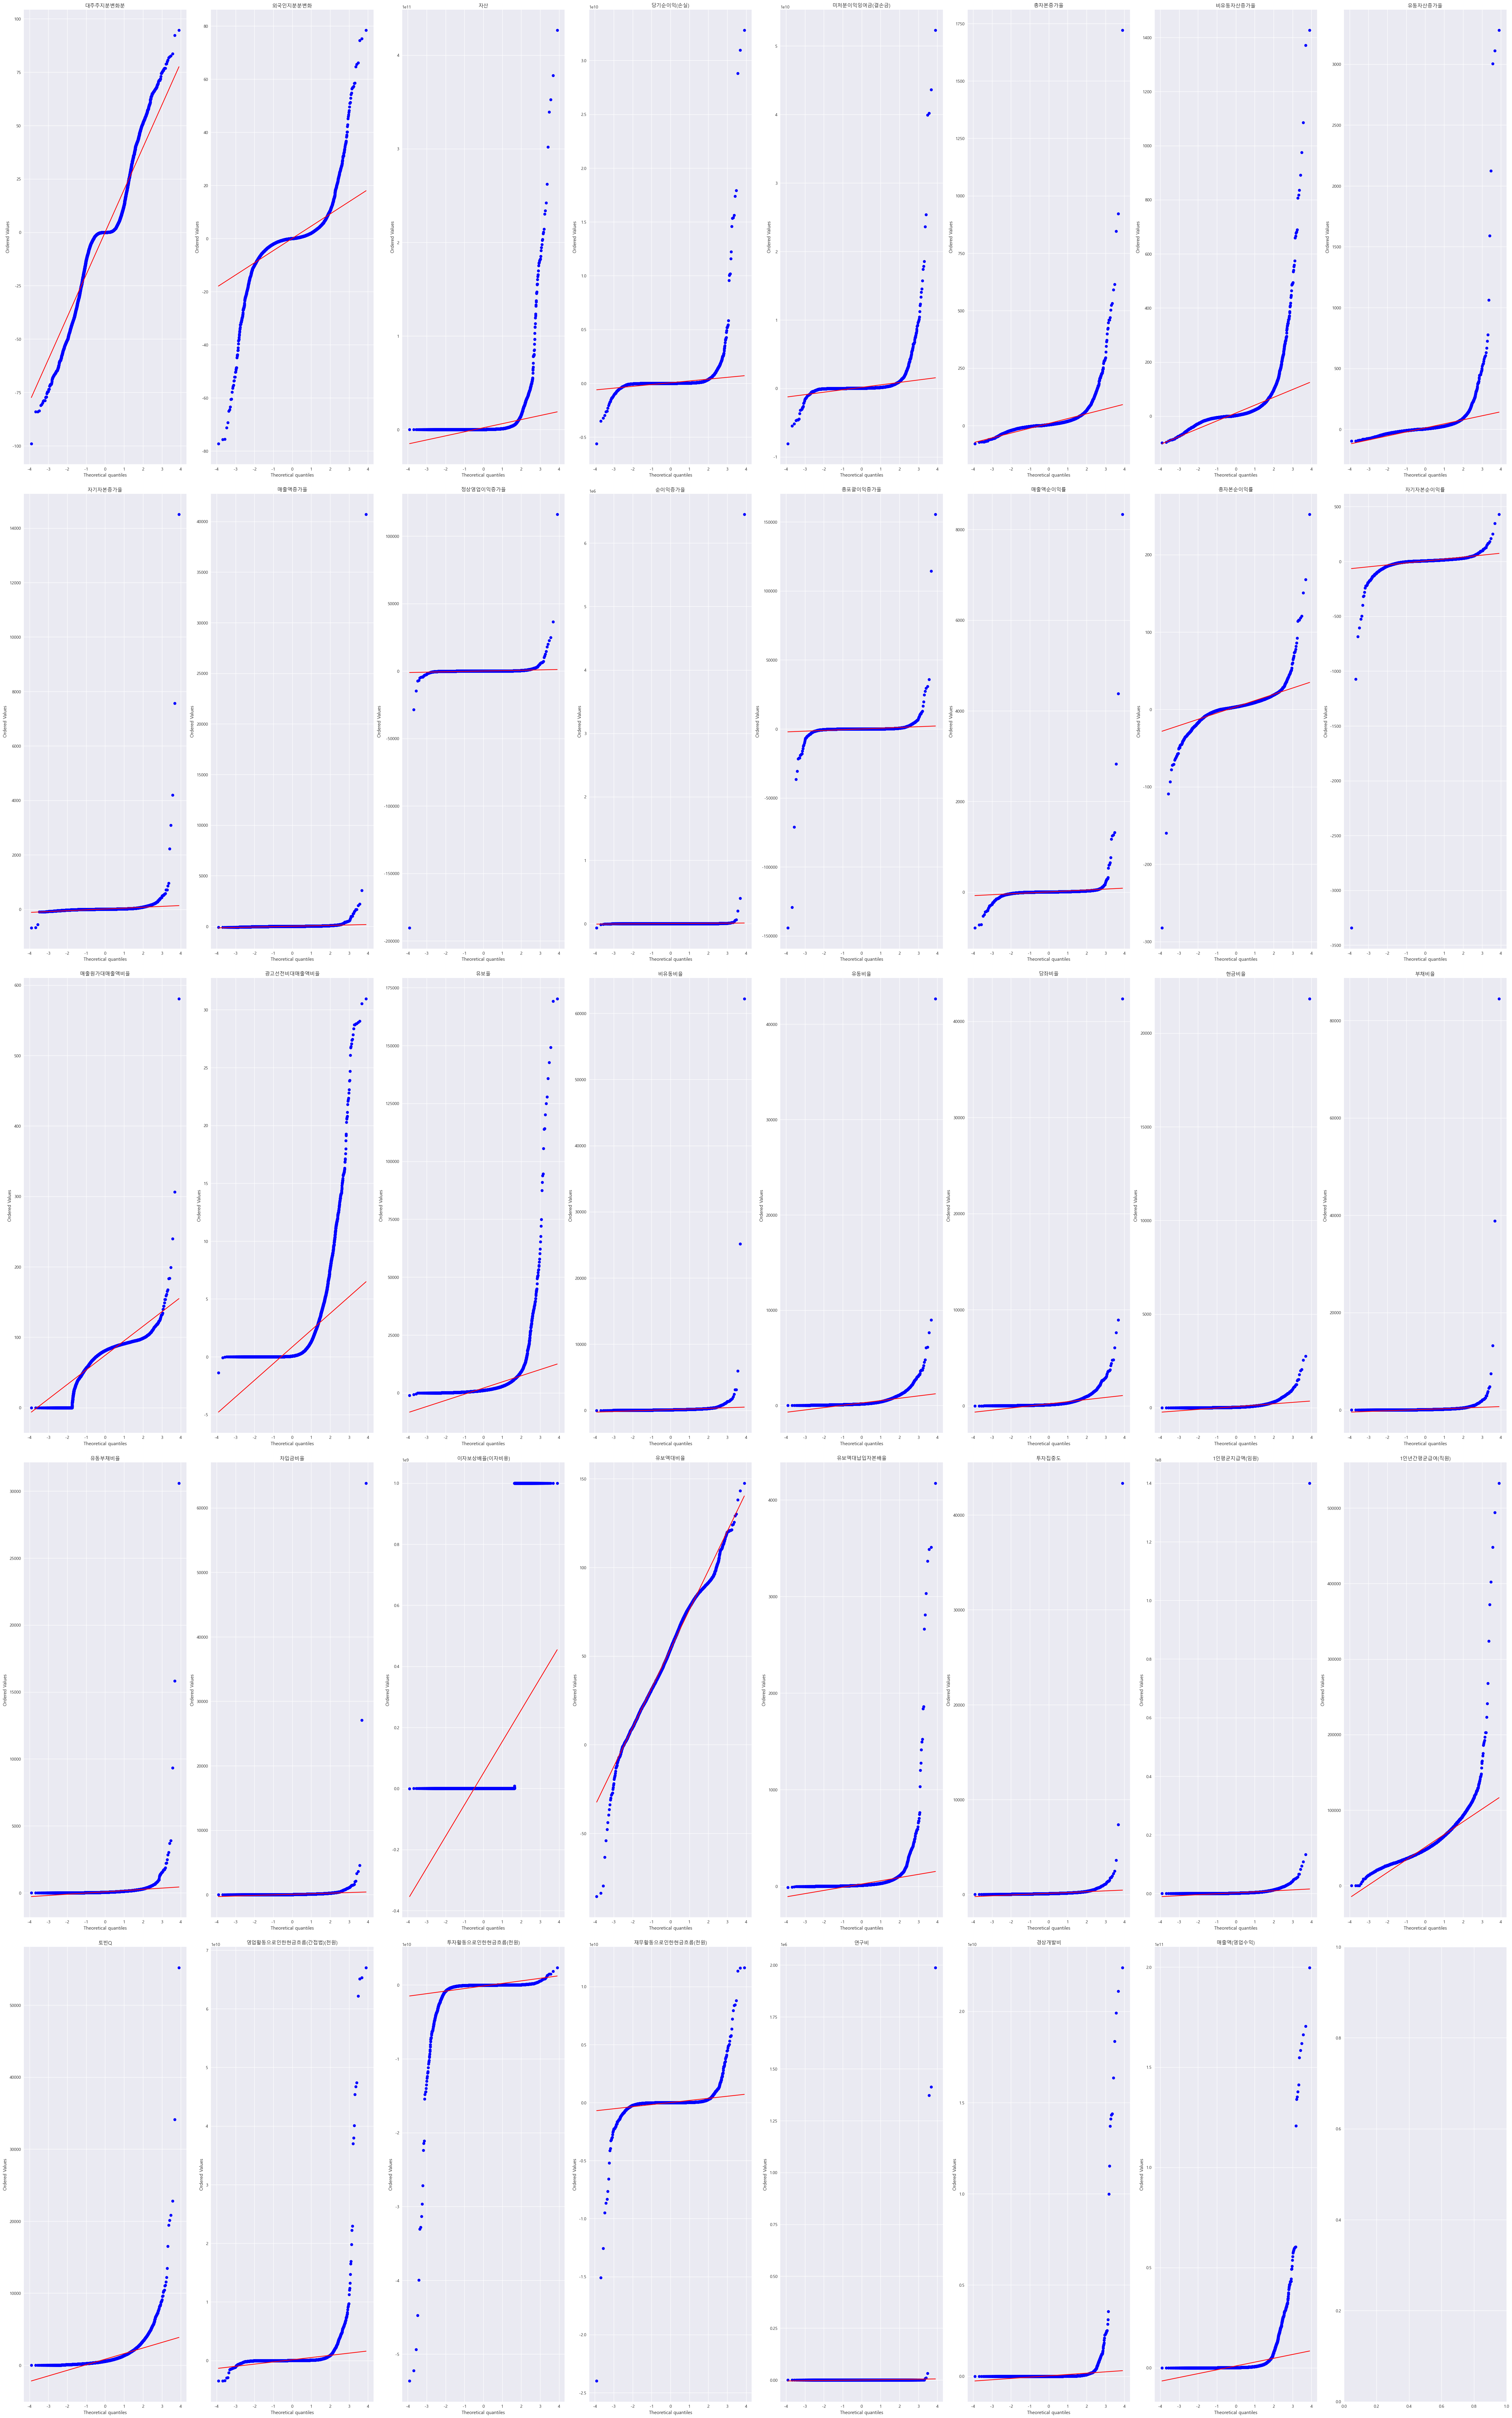

In [29]:
def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = "Malgun Gothic"
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((50, 80))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(수치형_df,8,5)


In [31]:
cmap = sns.light_palette("darkgray", as_cmap = True)
sns.set(font="Malgun Gothic",rc = {'figure.figsize':(16,8)})  

#pairplot
sns.pairplot(수치형_df)
plt.show()

KeyboardInterrupt: 